
Análisis de datos contexto

Para este escenario se busca predecir el comportamiento para retener a los clientes donde se va analizar todos los datos relevantes del cliente y desarrollar programas enfocados en la retención de clientes.

Con referencia con los datos cada fila representa un cliente, cada columna contiene los atributos del cliente descritos en la columna Metadatos.

El conjunto de datos incluye información sobre:

Clientes que se fueron en el último mes: la columna se llama Churn Servicios a los que se ha suscrito cada cliente: teléfono, líneas múltiples, Internet, seguridad en línea, respaldo en línea, protección del dispositivo, soporte técnico y transmisión de TV y películas Información de la cuenta del cliente: cuánto tiempo han sido clientes, contrato, método de pago, facturación electrónica, cargos mensuales y cargos totales Información demográfica sobre los clientes: género, rango de edad y si tienen socios y dependientes

Datos tomados de : https://www.kaggle.com/blastchar/telco-customer-churn

In [1]:
# en esta parte se hace carga de las librerias que vamos a usar para el proyecto

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import keras
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import SGD

Using TensorFlow backend.


## Carga y vizualización de datos

En este escenario se va a cargar datos que se  van utilizar para el análisis desde un archivo separado por comas, lo cual lo vamos a cargar en un set de datos para utilizarlo en todo el proyecto.

In [2]:
# con el comando data_path procedemos a cargar  los datos del archivo separado por comas

data_path = 'WA_Fn-UseC_-Telco-Customer-Churn.csv'

telco = pd.read_csv(data_path)
telco_original = telco

Con el fin de normalizar los datos que existen, se va a proceder a quitar todos los datos nulos y los NaNs.

In [3]:
# Para la siguiente parte procedemos a remover los remover NaNs

telco = telco.dropna()
telco_original = telco_original.dropna()

In [4]:
#En esta parte comprobamos si existen si existen nulos

telco.isnull().values.any()

False

In [5]:
#Cambia el tipo de dato de la Columna del total charges de String a Decimal

telco['TotalCharges'] = pd.to_numeric(telco['TotalCharges'], errors='coerce')

In [6]:
#Se muestra 5 filas del contenido del set de datos con las 21 columnas.

telco.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
telco.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


**VARIABLES**

Cada fila representa un cliente, cada columna contiene los atributos del cliente descritos en la columna Metadatos.
Los datos sin procesar contienen 7043 filas (clientes) y 21 columnas (características).
La columna "Churn" es nuestro objetivo los cuales son servicios que la gente se ha suscrito.
<ul>
<li><b>customerIDCustomer</b> ID  </li><br>
<li><b>GenderWhether</b> the customer is a male or a female </li><br>
<li><b>SeniorCitizenWhether</b> the customer is a senior citizen or not (1, 0)</li> <br>
<li><b>PartnerWhether</b> the customer has a partner or not (Yes, No)</li> <br>
<li><b>DependentsWhether</b> the customer has dependents or not (Yes, No)</li> <br>
<li><b>TenureNumber</b> of months the customer has stayed with the company</li> <br>
<li><b>PhoneServiceWhether</b> the customer has a phone service or not (Yes, No)</li> <br>
<li><b>MultipleLinesWhether</b> the customer has multiple lines or not (Yes, No, No phone service)</li> <br>
<li><b>InternetServiceCustomer’s</b> internet service provider (DSL, Fiber optic, No)</li><br>
<li><b>OnlineSecurityWhether</b> the customer has online security or not (Yes, No, No internet service)</li><br>
<li><b>OnlineBackupWhether</b> the customer has online backup or not (Yes, No, No internet service)</li><br>
<li><b>DeviceProtectionWhether</b> the customer has device protection or not (Yes, No, No internet service)</li><br>
<li><b>TechSupportWhether</b> the customer has tech support or not (Yes, No, No internet service)</li><br>
<li><b>StreamingTVWhether</b> the customer has streaming TV or not (Yes, No, No internet service)</li><br>
<li><b>StreamingMoviesWhether</b> the customer has streaming movies or not (Yes, No, No internet service)</li><br>
<li><b>ContractThe</b> contract term of the customer (Month-to-month, One year, Two year)</li><br>
<li><b>PaperlessBillingWhether</b> the customer has paperless billing or not (Yes, No)</li><br>
<li><b>PaymentMethodThe</b> customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))</li><br>
<li><b>MonthlyCharges</b> The amount charged to the customer monthly</li> <br>
<li><b>TotalCharges </b>The total amount charged to the customer</li><br>
<li><b>ChurnWhether</b> the customer churned or not (Yes or No)</li> <br>
 </ul>

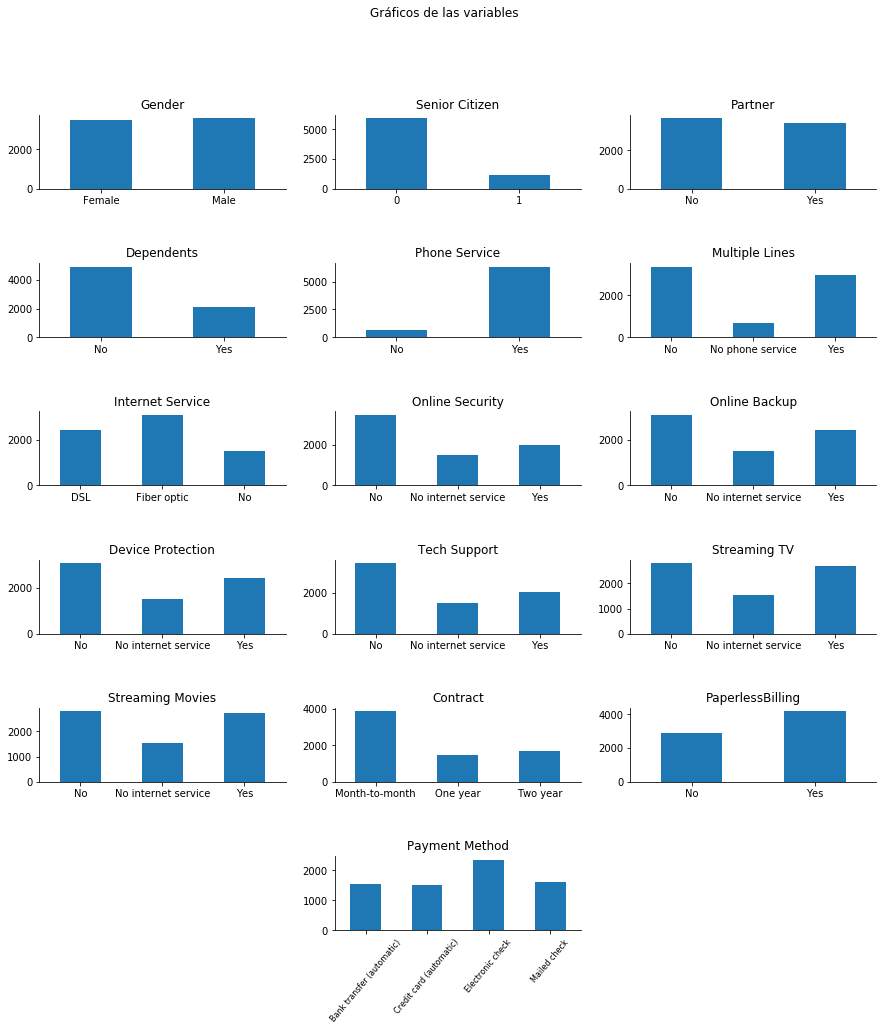

In [8]:
fig, axarr = plt.subplots(nrows=6, ncols=3, 
                           # que sus escalas sean diferentes
                           sharex=False, sharey=False)

fig.set_figwidth(15)
fig.set_figheight(15)
# establecer título global
fig.suptitle("Gráficos de las variables")

#Fila 1
telco_original['gender'].value_counts().sort_index().plot.bar(ax=axarr[0][0], rot=0)
axarr[0][0].set_title('Gender')

telco_original['SeniorCitizen'].value_counts().sort_index().plot.bar(ax=axarr[0][1], rot=0)
axarr[0][1].set_title('Senior Citizen')

telco_original['Partner'].value_counts().sort_index().plot.bar(ax=axarr[0][2], rot=0)
axarr[0][2].set_title('Partner')

#Fila 2
telco_original['Dependents'].value_counts().sort_index().plot.bar(ax=axarr[1][0], rot=0)
axarr[1][0].set_title('Dependents')

telco_original['PhoneService'].value_counts().sort_index().plot.bar(ax=axarr[1][1], rot=0)
axarr[1][1].set_title('Phone Service')

telco_original['MultipleLines'].value_counts().sort_index().plot.bar(ax=axarr[1][2], rot=0)
axarr[1][2].set_title('Multiple Lines')

#Fila 3
telco_original['InternetService'].value_counts().sort_index().plot.bar(ax=axarr[2][0], rot=0)
axarr[2][0].set_title('Internet Service')

telco_original['OnlineSecurity'].value_counts().sort_index().plot.bar(ax=axarr[2][1], rot=0)
axarr[2][1].set_title('Online Security')

telco_original['OnlineBackup'].value_counts().sort_index().plot.bar(ax=axarr[2][2], rot=0)
axarr[2][2].set_title('Online Backup')

#Fila 4
telco_original['DeviceProtection'].value_counts().sort_index().plot.bar(ax=axarr[3][0], rot=0)
axarr[3][0].set_title('Device Protection')

telco_original['TechSupport'].value_counts().sort_index().plot.bar(ax=axarr[3][1], rot=0)
axarr[3][1].set_title('Tech Support')

telco_original['StreamingTV'].value_counts().sort_index().plot.bar(ax=axarr[3][2], rot=0)
axarr[3][2].set_title('Streaming TV')

#Fila 5
telco_original['StreamingMovies'].value_counts().sort_index().plot.bar(ax=axarr[4][0], rot=0)
axarr[4][0].set_title('Streaming Movies')

telco_original['Contract'].value_counts().sort_index().plot.bar(ax=axarr[4][1], rot=0)
axarr[4][1].set_title('Contract')

telco_original['PaperlessBilling'].value_counts().sort_index().plot.bar(ax=axarr[4][2], rot=0)
axarr[4][2].set_title('PaperlessBilling')

#Fila 6
axarr[5][0].remove()
#axarr[5][1].remove()
axarr[5][2].remove()

#axbig = fig.add_subplot(gs[-1, 0:2])
#axbig.set_size_inches(w=11,h=7)

telco_original['PaymentMethod'].value_counts().sort_index().plot.bar(ax=axarr[5][1], rot=50)
axarr[5][1].set_title('Payment Method')
axarr[5][1].tick_params(axis='x', labelsize=8)

#axarr.flat[-1].set_visible(False) # to remove last plot
#axarr.flat[-3].set_visible(False) # to remove last plot
#axarr[1,2].set_axis_off()


#tenure
plt.subplots_adjust(hspace=1)
sns.despine()

# Verificando los datos

<b>Contexto de verificación</b>

Se busca como predecir el comportamiento de los clientes con el fin de analizar esta información y buscar cómo se puede crear estrategias para retenerlos.

Cada fila representa un cliente, cada columna contiene los atributos del cliente descritos en la columna Metadatos.
El conjunto de datos incluye información sobre:
Clientes que se fueron en el último mes: la columna se llama Churn
Servicios a los que se ha suscrito cada cliente: teléfono, líneas múltiples, Internet, seguridad en línea, respaldo en línea, protección del dispositivo, soporte técnico y transmisión de TV y películas
Información de la cuenta del cliente: cuánto tiempo han sido clientes, contrato, método de pago, facturación electrónica, cargos mensuales y cargos totales
Información demográfica sobre los clientes: género, rango de edad, si tienen socios y dependientes.

### Variables Dummy

Para la Churn nos dice si el cliente se ha suscrito  con un 0 si es "no" o un 1 si es "si" <br>
Para la columna Partner, se muestra 0 cuando no es socio o 1 cuando si lo es. <br>
Para la columna Dependents, se muestra 0 en no y 1 si. <br>
Para la columna PhoneServices se estable 0 si el cliente no lo tiene o 1 en el caso de que si. <br>
Para la columna PaperlessBilling Facturación con papel 1 Si es en papel o  "no" 0 sin papel

In [9]:
telco['Churn'] = telco['Churn'].replace({'No' : 0, 'Yes' : 1})

telco['gender'] = telco['gender'].replace({'Male' : 0, 'Female' : 1})
telco['Partner'] = telco['Partner'].replace({'No' : 0, 'Yes' : 1})
telco['Dependents'] = telco['Dependents'].replace({'No' : 0, 'Yes' : 1})
telco['PhoneService'] = telco['PhoneService'].replace({'No' : 0, 'Yes' : 1})
telco['PaperlessBilling'] = telco['PaperlessBilling'].replace({'No' : 0, 'Yes' : 1})

In [10]:
telco['Churn'].dtypes

dtype('int64')

In [11]:
dummy_fields =  [ 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup'
                , 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'
                , 'Contract', 'PaymentMethod' ]
for each in dummy_fields:
    dummies = pd.get_dummies(telco[each], prefix=each, drop_first=False)
    telco = pd.concat([telco, dummies], axis=1)

fields_to_drop = [ 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup'
                , 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'
                , 'Contract', 'PaymentMethod' ]
data = telco.drop(fields_to_drop, axis=1)
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,1,0,1,0,1,0,1,29.85,29.85,...,1,0,0,1,0,0,0,0,1,0
1,5575-GNVDE,0,0,0,0,34,1,0,56.95,1889.50,...,1,0,0,0,1,0,0,0,0,1
2,3668-QPYBK,0,0,0,0,2,1,1,53.85,108.15,...,1,0,0,1,0,0,0,0,0,1
3,7795-CFOCW,0,0,0,0,45,0,0,42.30,1840.75,...,1,0,0,0,1,0,1,0,0,0
4,9237-HQITU,1,0,0,0,2,1,1,70.70,151.65,...,1,0,0,1,0,0,0,0,1,0


### Esclando las variables target

Es esta parte se buscar establecer varíales meta con el fin de analizar el comportamiento de los clientes para la venta, donde se establece el diccionario el cual se va a utilizar en el análisis.

In [12]:
quant_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
# Store scalings in a dictionary so we can convert back later
scaled_features = {}
for each in quant_features:
    mean, std = data[each].mean(), data[each].std()
    scaled_features[each] = [mean, std]
    data.loc[:, each] = (data[each] - mean)/std

In [13]:
data.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
count,7043.000000,7043.000000,7043.000000,7043.000000,7.043000e+03,7043.000000,7043.000000,7.043000e+03,7.032000e+03,7043.000000,...,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.495244,0.162147,0.483033,0.299588,-2.118614e-17,0.903166,0.592219,-6.406285e-17,8.310885e-17,0.265370,...,0.395428,0.216669,0.387903,0.550192,0.209144,0.240664,0.219225,0.216101,0.335794,0.228880
std,0.500013,0.368612,0.499748,0.458110,1.000000e+00,0.295752,0.491457,1.000000e+00,1.000000e+00,0.441561,...,0.488977,0.412004,0.487307,0.497510,0.406726,0.427517,0.413751,0.411613,0.472301,0.420141
min,0.000000,0.000000,0.000000,0.000000,-1.318071e+00,0.000000,0.000000,-1.545750e+00,-9.989982e-01,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,-9.516141e-01,1.000000,0.000000,-9.724708e-01,-8.301898e-01,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,-1.372647e-01,1.000000,1.000000,1.857195e-01,-3.907873e-01,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,9.213896e-01,1.000000,1.000000,8.337743e-01,6.667797e-01,1.000000,...,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.613587e+00,1.000000,1.000000,1.794225e+00,2.824061e+00,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Partición de los datos en training y testing

In [14]:
# Splitting the data input into X, and the labels y 
X = np.array(data)[:,1:]
X = X.astype('float32')
y = keras.utils.to_categorical(data["Churn"],2)

In [15]:
# Checking that the input and output look correct
print("Shape of X:", X.shape)
print("\nShape of y:", y.shape)
print("\nFirst 10 rows of X")
print(X[:10])
print("\nFirst 10 rows of y")
print(y[:10])

Shape of X: (7043, 41)

Shape of y: (7043, 2)

First 10 rows of X
[[ 1.          0.          1.          0.         -1.2773539   0.
   1.         -1.1602405  -0.9941234   0.          0.          1.
   0.          1.          0.          0.          1.          0.
   0.          0.          0.          1.          1.          0.
   0.          1.          0.          0.          1.          0.
   0.          1.          0.          0.          1.          0.
   0.          0.          0.          1.          0.        ]
 [ 0.          0.          0.          0.          0.06632271  1.
   0.         -0.2596105  -0.17372747  0.          1.          0.
   0.          1.          0.          0.          0.          0.
   1.          1.          0.          0.          0.          0.
   1.          1.          0.          0.          1.          0.
   0.          1.          0.          0.          0.          1.
   0.          0.          0.          0.          1.        ]
 [ 0.          0

In [16]:
# break training set into training and validation sets
(X_train, X_test) = X[80:], X[:20]
(y_train, y_test) = y[80:], y[:20]

# print shape of training set
print('x_train shape:', X_train.shape)

# print number of training, validation, and test images
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

x_train shape: (6963, 41)
6963 train samples
20 test samples


## Definición de la arquitectura de la red neuronal

Primero vamos a definir que es una **Red Neuronal**, las redes neuronales son modelos computacionales mediante los que se pretender reproducir la forma en la que trabajan los cerebros biológicos.<br>
Para implementarlos se utilizan conjuntos de unidades básicas de procesamiento, a las que se les denomina **Perceptrón** (neuronas), organizadas en capas y conectadas entre sí. Cada una de los perceptrón agrega sus entradas y realiza una operación sobre ella mediante una función de activación.<br>
Los enlaces entre cada perceptrón trasmiten estos resultados ponderado por un peso que puede incrementar o inhibir la respuesta que llega a la neurona de la siguiente capa.<br>
Este es un bosquejo muy simple de una red neuronal:

![Codigo](https://raw.githubusercontent.com/paumorso/DataSicience/master/redneuronal.jpg)

A partir de lo explicado vamos a construir la red neuronal. Para ello es necesario obtener los valores de entrada que van en realción a la cantidad de variables que usaremos.<br>
Luego procedemos a configurar las **Capas**, la cual es el bloque de construcción esencial de una Red Neuronal. Las capas extraen descripciones (representaciones) de los datos introducidos en ellas.<br>
TensorFlow nos proporciona una librería con capas simples ya programadas cuyos parámetros se verán alterados durante el proceso de entrenamiento sustanciando y condensando el aprendizaje mediante la variación de los valores asociados a determinados parámetros constituyentes de las capas que configuran el Modelo.<br>
Antes de contar con un modelo listo, seguiremos con **Compilar** el Modelo, para entrenar debemos configurar algunas características más.<br>
Aprovechamos el paso de compilación para añadir dicha configuración que se detallan a continuación.<br>
**Función de Pérdida**: Mide la precisión del modelo durante el entrenamiento. El objetivo del proceso de aprendizaje es minimizar esta función en cada una de las iteraciones, dirigiendo al modelo en la dirección correcta.<br>
**Optimizador**: Es la manera en la que aproximamos al modelo a su ideal de aprendizaje. Mediamos un optimizador para actualizar el modelo conforme a los datos de entrada y a la función de pérdida.<br>
**Métrica**: Permite evaluar y controlar los pasos de entrenamiento y evaluación, conociendo en un determinado momento cuan bueno es un modelo en el desempeño de la tarea que le estamos enseñando a resolver.<br>

In [21]:
model = Sequential()

model.add(Dense(512, input_dim=41))
model.add(Activation('tanh'))
model.add(Dropout(.3)) 

model.add(Dense(128))
model.add(Activation('sigmoid'))
model.add(Dropout(.2)) 

model.add(Dense(64))
model.add(Activation('linear'))
model.add(Dropout(.1))

model.add(Dense(2))
model.add(Activation('sigmoid'))

model.compile(loss = 'mean_squared_error', optimizer='rmsprop', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 512)               21504     
_________________________________________________________________
activation_5 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               65664     
_________________________________________________________________
activation_6 (Activation)    (None, 128)               0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 64)                8256      
__________

## Entrenamiento del modelo

En la configuración aleatoria actual los valores obtenidos serán completamente erróneos. El proceso de ajuste es el proceso de entrenamiento de la red neuronal.<br>
Generalmente, el entrenamiento de las redes neuronales se realiza con un proceso que se llama propagación de hacia atrás (backpropagation). Este es un proceso iterativo en el que inicialmente se obtienen las predicciones de la red con los valores actuales y, posteriormente se corrigen propagando el error que se comete hacia atrás.<br>
El parámetro **epochs** indica el número de iteraciones de los conjuntos de datos de entrenamiento que el Modelo realizará sobre el algoritmo de aprendizaje completo, aumentando el conocimiento del Modelo con cada iteración así como la métrica de precisión para desempeñar esa labor.<br>

In [22]:
# Training the model
#model.fit(X_train, y_train, epochs=200, batch_size=100, verbose=0)
model.fit(X_train, y_train, epochs=500, batch_size=200, verbose=0)

## Score del modelo:

La precisión se sustancia sobre dos métricas.<br>
Inicialmente se mensura la precisión del Modelo sobre el conjunto de datos con el que ha sido entrenado.<br>
Posteriormente, sobre el conjunto de datos de evaluación.<br>
Con esto podemos establecer una comparativa entre la precisión sobre el Conjunto de Entrenamiento y sobre el Conjunto de Evaluación.<br>
Idealmente el entrenamiento del Modelo debería servir para extraer, partiendo exclusivamente de los datos de entrenamiento, características generales sobre la cuestión que representan.<br>
Un Modelo sobreajustado se circunscribe demasiado a las características que presentan los datos de entrenamiento y no ha extraído toda la generalización posible sobre dichos datos.<br>
**Sobreajuste** es cuando un Modelo de Machine Learning se comporta peor con los datos nuevos que con los datos de entrenamiento, mientras que el **Subajuste** es cuando se comporta peor con ambos conjuntos de datos, o sea, con los de entrenamiento como con los de evaluación.<br>

In [23]:
# Evaluating the model on the training and testing set
score = model.evaluate(X_train, y_train)
print("\n Training Accuracy:", score[1])
score = model.evaluate(X_test, y_test)
print("\n Testing Accuracy:", score[1])

6963/6963 [==============================] - 0s 35us/step

 Training Accuracy: 0.7343099239604254
20/20 [==============================] - 0s 150us/step

 Testing Accuracy: 0.699999988079071


## Conclusión

Se utilizó una red neuronal convolucional para predecir el comportamiento para retener a los clientes donde se va analizar todos los datos relevantes del cliente, consiguiendo un 70% de precisión de generalización del modelo en sus resultados. 